# Importing Necessary Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading Data

In [20]:
data=pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [21]:
data.shape

(40000, 2)

In [22]:
data = data.iloc[:10000,:]

In [23]:
data.shape

(10000, 2)

In [24]:
data['label'].value_counts()

label
0    5043
1    4957
Name: count, dtype: int64

<AxesSubplot:xlabel='label'>

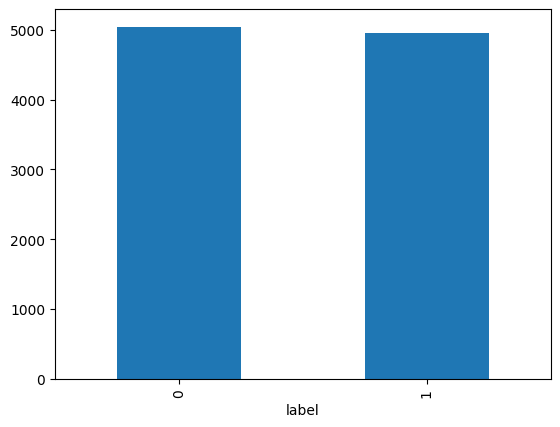

In [25]:
data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

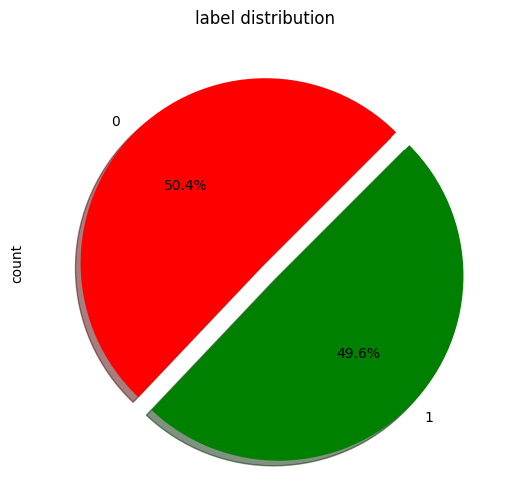

In [26]:
plt.figure(figsize=(10,6))
colors = ['red', 'green']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

In [30]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)
 

In [32]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [33]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [34]:
data['text']

0       grew b 1965 watch love thunderbird mate school...
1       put movi dvd player sat coke chip expect hope ...
2       peopl know particular time past like feel need...
3       even though great interest biblic movi bore de...
4       im die hard dad armi fan noth ever chang got t...
                              ...                        
9995    one cerebr insight movi ever seen script langu...
9996    first movi near complet guess someon actual bo...
9997    said movi cross dress gangster much averag ind...
9998    like adult comedi cartoon like south park near...
9999    well start straighthead present bit dilemma fi...
Name: text, Length: 10000, dtype: object

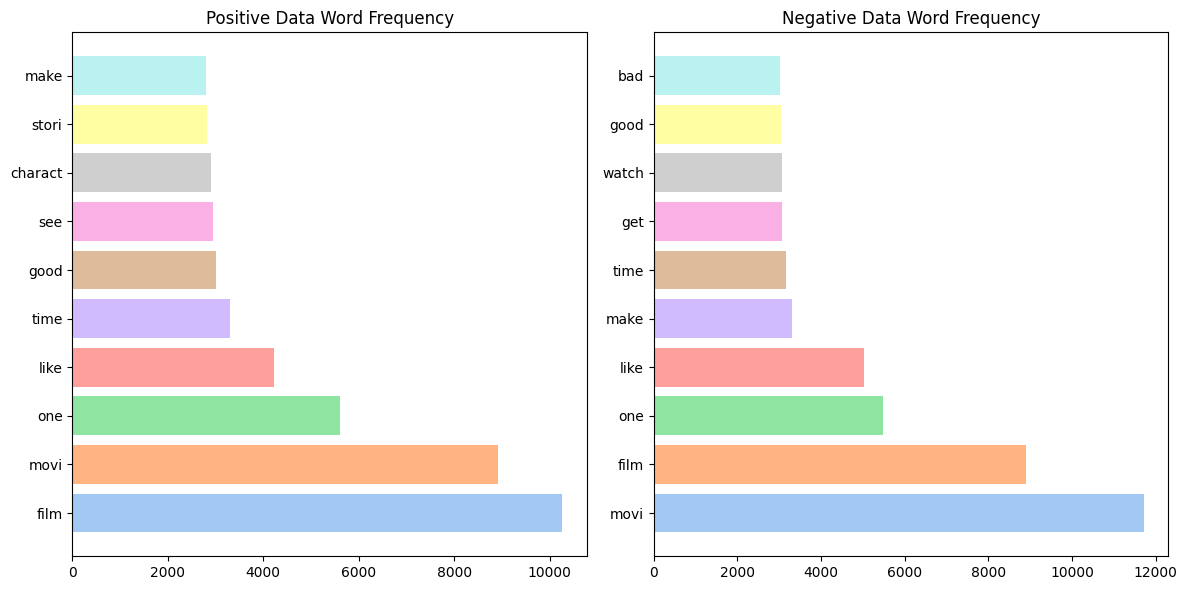

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Assuming you have a DataFrame named 'data' with columns 'label' and 'text'
# ...

# Separate positive and negative data
positivedata = data[data['label'] == 1]['text']
negdata = data[data['label'] == 0]['text']

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Set a color palette
colors = sns.color_palette("pastel")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words],
             align='center', color=colors)
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words],
             align='center', color=colors)
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


In [39]:
!pip install wordcloud


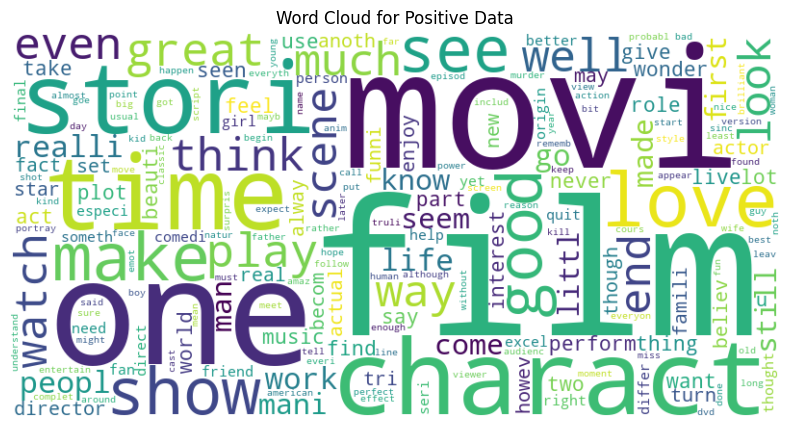

In [42]:

# Word Cloud for Positive Data
positivedata_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positivedata))

plt.figure(figsize=(10, 5))
plt.imshow(positivedata_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Data')
plt.show()



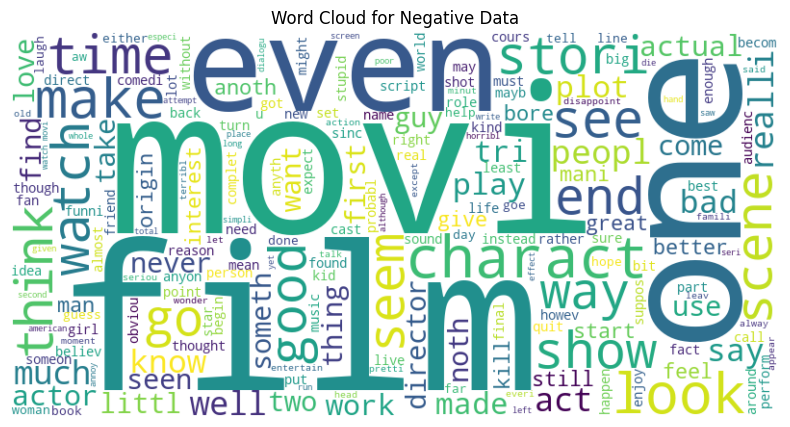

In [43]:
# Word Cloud for Negative Data
negdata_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negdata))

plt.figure(figsize=(10, 5))
plt.imshow(negdata_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Data')
plt.show()


# TF-IDF Vertorizer

In [45]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

# Train Test Split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)


In [48]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   27.7s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   29.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   29.1s finished


In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8756


# Saved model

In [50]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))